In [133]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [134]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [135]:
bc.target.shape

(569,)

In [136]:
bc.data.shape

(569, 30)

Preprocessing

In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [138]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[0.443419  , 0.45924924, 0.45062539, ..., 0.77437134, 0.64242066,
        0.26957891],
       [0.59392304, 0.76969902, 0.58192247, ..., 0.55976576, 0.22629608,
        0.13537977],
       [0.32604477, 0.37166047, 0.31773893, ..., 0.23579056, 0.13483146,
        0.19598583],
       ...,
       [0.14667045, 0.18261752, 0.13800014, ..., 0.0358939 , 0.26966292,
        0.14384101],
       [0.17412088, 0.18397024, 0.16377583, ..., 0.        , 0.22570471,
        0.04329004],
       [0.27398362, 0.43151843, 0.26211043, ..., 0.32142611, 0.24916223,
        0.16810967]], shape=(455, 30))

In [140]:
x_test

array([[0.23422784, 0.04058167, 0.22355055, ..., 0.23685842, 0.17642421,
        0.11530893],
       [0.204411  , 0.28677714, 0.20827863, ..., 0.41956597, 0.34358368,
        0.48970222],
       [0.4770221 , 0.38180588, 0.46997443, ..., 0.62934895, 0.2085551 ,
        0.13741309],
       ...,
       [0.61096124, 0.35678052, 0.5991984 , ..., 0.5556321 , 0.19396807,
        0.23822642],
       [0.16607506, 0.323977  , 0.163223  , ..., 0.11033414, 0.24857087,
        0.13433032],
       [0.31421269, 0.45722016, 0.29991017, ..., 0.24712367, 0.21230041,
        0.09504132]], shape=(114, 30))

# Classification

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    per = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    print(f"acc_train:{acc_train} and acc_test:{acc_test} and precision:{per} and recall:{rec}")
    return acc_train, acc_test, per, rec

1. Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [143]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
acc_train_gnb, acc_test_gnb, per_gnb, rec_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9318681318681319 and acc_test:0.9385964912280702 and precision:0.9733333333333334 and recall:0.9358974358974359


2. KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
acc_train_knn, acc_test_knn, per_knn, rec_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9714285714285714 and acc_test:0.9912280701754386 and precision:0.9873417721518988 and recall:1.0


3. Decision tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=100,min_samples_split=4)
tree.fit(x_train, y_train)
y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)
acc_train_tree, acc_test_tree, per_tree, rec_tree = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9978021978021978 and acc_test:0.9385964912280702 and precision:0.9733333333333334 and recall:0.9358974358974359


4. Random forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,max_depth=32,min_samples_split=8)
forest.fit(x_train, y_train)
y_pred_train = forest.predict(x_train)
y_pred_test = forest.predict(x_test)
acc_train_forest, acc_test_forest, per_forest, rec_forest = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9956043956043956 and acc_test:0.9912280701754386 and precision:0.9873417721518988 and recall:1.0


5. SVM

In [147]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
acc_train_svm, acc_test_svm, per_svm, rec_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9846153846153847 and acc_test:0.9912280701754386 and precision:0.9873417721518988 and recall:1.0


6. Logistic regression

In [148]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
acc_train_lr, acc_test_lr, per_lr, rec_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9714285714285714 and acc_test:0.9824561403508771 and precision:0.975 and recall:1.0


7. ANN

In [149]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu',solver='adam')
ann.fit(x_train, y_train)
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)
acc_train_ann, acc_test_ann, per_ann, rec_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9846153846153847 and acc_test:0.9912280701754386 and precision:0.9873417721518988 and recall:1.0


C:\Users\me.soleymani\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Comparison

<BarContainer object of 7 artists>

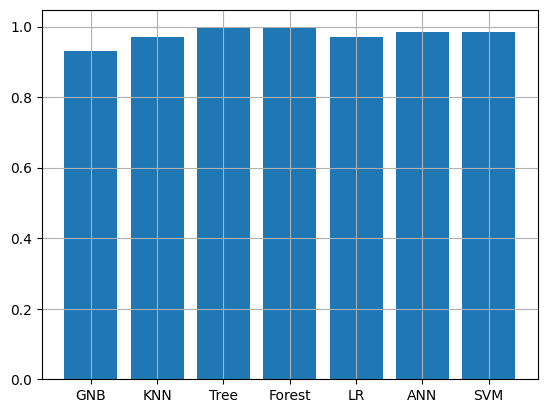

In [150]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_tree, acc_train_forest, acc_train_lr, acc_train_ann, acc_train_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, acc_train)

<BarContainer object of 7 artists>

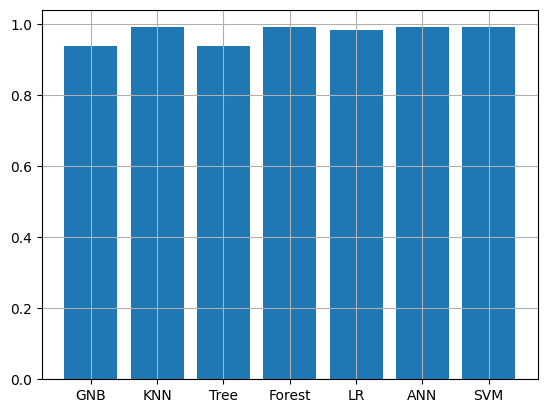

In [151]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_tree, acc_test_forest, acc_test_lr, acc_test_ann, acc_test_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, acc_test)

<BarContainer object of 7 artists>

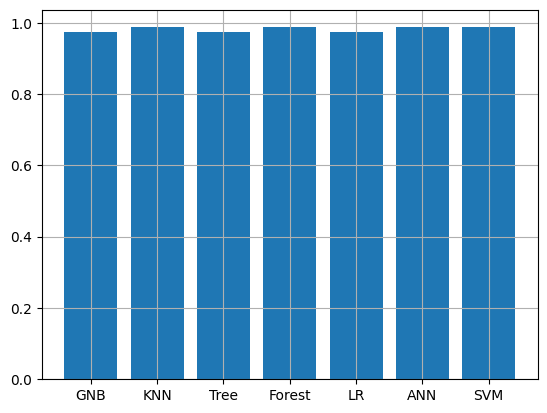

In [152]:
per = [per_gnb, per_knn, per_tree, per_forest, per_lr, per_ann, per_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, per)

<BarContainer object of 7 artists>

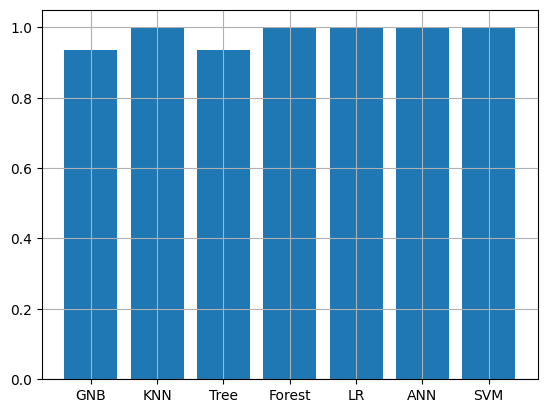

In [153]:
rec = [ rec_gnb, rec_knn, rec_tree, rec_forest, rec_lr, rec_ann, rec_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, rec)